# Examining the Impact of Race, Sex, and Age on Arrests and Strip Searches in Toronto



<center> Master of Information: INF2178<br>
Professor: Shion Guha<br>
Group1: Shaochenzi Wang ; Shiqing Lu<br>
Date: Feb 28, 2023<br>
 </center>

# 0.0 Research Question and Hypothesis

## 0.1 Research Question
* What is the distribution of Actions_at_arrest for individuals being arrested and how does them vary based on race and sex?
* Does the likelihood of being strip searched for individuals who are youth differ from the likelihood of being strip searched for individuals who are not youth based on their sex and perceived race? 

# 1.0 EDA


In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, sys

from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind
import statsmodels.stats.multicomp as mc

In [203]:
# Load the dataset into a Pandas dataframe,preview the data to see what the categories are
df = pd.read_csv('/Users/Swan/Desktop/inf1344/dataset.csv')
df.head()

,Arrest_Year,Arrest_Month,EventID,ArrestID,PersonID,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,...,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound,ObjectId
0,2020,July-Sept,1005907,6017884.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,1,NaN,NaN,NaN,NaN,NaN,1
1,2020,July-Sept,1014562,6056669.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,2
2,2020,Oct-Dec,1029922,6057065.0,326622,Unknown or Legacy,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,3
3,2021,Jan-Mar,1052190,6029059.0,327535,Black,M,Aged 25 to 34 years,Not a youth,XX,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,4
4,2021,Jan-Mar,1015512,6040372.0,327535,South Asian,M,Aged 25 to 34 years,Not a youth,XX,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,5


In [204]:
# Get a summary of the numerical columns in the data
df.describe()

,Arrest_Year,EventID,ArrestID,PersonID,StripSearch,Booked,Actions_at_arrest___Concealed_i,Actions_at_arrest___Combative__,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound,ObjectId
count,65276.000000,6.527600e+04,6.480700e+04,65276.000000,65276.000000,65276.000000,65276.000000,65276.000000,65276.000000,65276.000000,65276.000000,65276.000000,7801.000000,7801.000000,7801.000000,7801.000000,7801.000000,65276.000000
mean,2020.510096,1.029998e+06,6.032402e+06,318599.919695,0.119508,0.519502,0.004075,0.044136,0.038330,0.033381,0.006358,0.445937,0.765671,0.343161,0.453403,0.418921,0.373157,32638.500000
std,0.499902,1.731809e+04,1.870751e+04,10815.387928,0.324388,0.499623,0.063706,0.205398,0.191992,0.179632,0.079481,0.497072,0.423606,0.474795,0.497856,0.493414,0.483674,18843.702423
min,2020.000000,1.000000e+06,6.000000e+06,300000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2020.000000,1.015001e+06,6.016202e+06,309215.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,16319.750000
50%,2021.000000,1.030006e+06,6.032402e+06,318595.500000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,32638.500000
75%,2021.000000,1.044996e+06,6.048602e+06,327926.250000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,48957.250000
max,2021.000000,1.060002e+06,6.064804e+06,337346.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,65276.000000


In [205]:
# Get a summary of the non-numerical columns in the data
df.describe(include=['O'])

,Arrest_Month,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,Occurrence_Category
count,65276,65272,65276,65252,65276,65276,65111
unique,4,8,3,9,3,18,31
top,Jan-Mar,White,M,Aged 25 to 34 years,Not a youth,XX,Assault
freq,17613,27723,52650,20949,62234,29646,7726


In [206]:
# Get the number of missing values in each column 
print(df.isnull().sum())

Arrest_Year                            0
Arrest_Month                           0
EventID                                0
ArrestID                             469
PersonID                               0
Perceived_Race                         4
Sex                                    0
Age_group__at_arrest_                 24
Youth_at_arrest__under_18_years        0
ArrestLocDiv                           0
StripSearch                            0
Booked                                 0
Occurrence_Category                  165
Actions_at_arrest___Concealed_i        0
Actions_at_arrest___Combative__        0
Actions_at_arrest___Resisted__d        0
Actions_at_arrest___Mental_inst        0
Actions_at_arrest___Assaulted_o        0
Actions_at_arrest___Cooperative        0
SearchReason_CauseInjury           57475
SearchReason_AssistEscape          57475
SearchReason_PossessWeapons        57475
SearchReason_PossessEvidence       57475
ItemsFound                         57475
ObjectId        

In [207]:
# Remove duplicate records 
df.drop_duplicates(inplace=True)

# Impute missing values with a default value
df['Occurrence_Category'].fillna(df['Occurrence_Category'].mode()[0], inplace=True)
df['Age_group__at_arrest_'].fillna(df['Age_group__at_arrest_'].mode()[0], inplace=True)
df['Perceived_Race'].fillna(df['Perceived_Race'].mode()[0], inplace=True)

In [208]:
print(df.isnull().sum())

Arrest_Year                            0
Arrest_Month                           0
EventID                                0
ArrestID                             469
PersonID                               0
Perceived_Race                         0
Sex                                    0
Age_group__at_arrest_                  0
Youth_at_arrest__under_18_years        0
ArrestLocDiv                           0
StripSearch                            0
Booked                                 0
Occurrence_Category                    0
Actions_at_arrest___Concealed_i        0
Actions_at_arrest___Combative__        0
Actions_at_arrest___Resisted__d        0
Actions_at_arrest___Mental_inst        0
Actions_at_arrest___Assaulted_o        0
Actions_at_arrest___Cooperative        0
SearchReason_CauseInjury           57475
SearchReason_AssistEscape          57475
SearchReason_PossessWeapons        57475
SearchReason_PossessEvidence       57475
ItemsFound                         57475
ObjectId        

In [153]:
# Updated df
df.head()

,Arrest_Year,Arrest_Month,EventID,ArrestID,PersonID,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,...,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound,ObjectId
0,2020,July-Sept,1005907,6017884.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,1,NaN,NaN,NaN,NaN,NaN,1
1,2020,July-Sept,1014562,6056669.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,2
2,2020,Oct-Dec,1029922,6057065.0,326622,Unknown or Legacy,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,3
3,2021,Jan-Mar,1052190,6029059.0,327535,Black,M,Aged 25 to 34 years,Not a youth,XX,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,4
4,2021,Jan-Mar,1015512,6040372.0,327535,South Asian,M,Aged 25 to 34 years,Not a youth,XX,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,5


# 2.0 Descriptive Statistics 


## For the research question 1:

To identify the predominant category of actions at arrests, six diagrams were constructed, and they analysis showed that "Actions_at_arrest___Cooperative" was the most prominent one, characterized by the highest frequency of 1.00. Specifically, the analysis indicated that among the total 65276 cases, 29109 individuals displayed non-cooperative behavior, thus highlighting the significance of this category in predicting the likelihood of arrest.

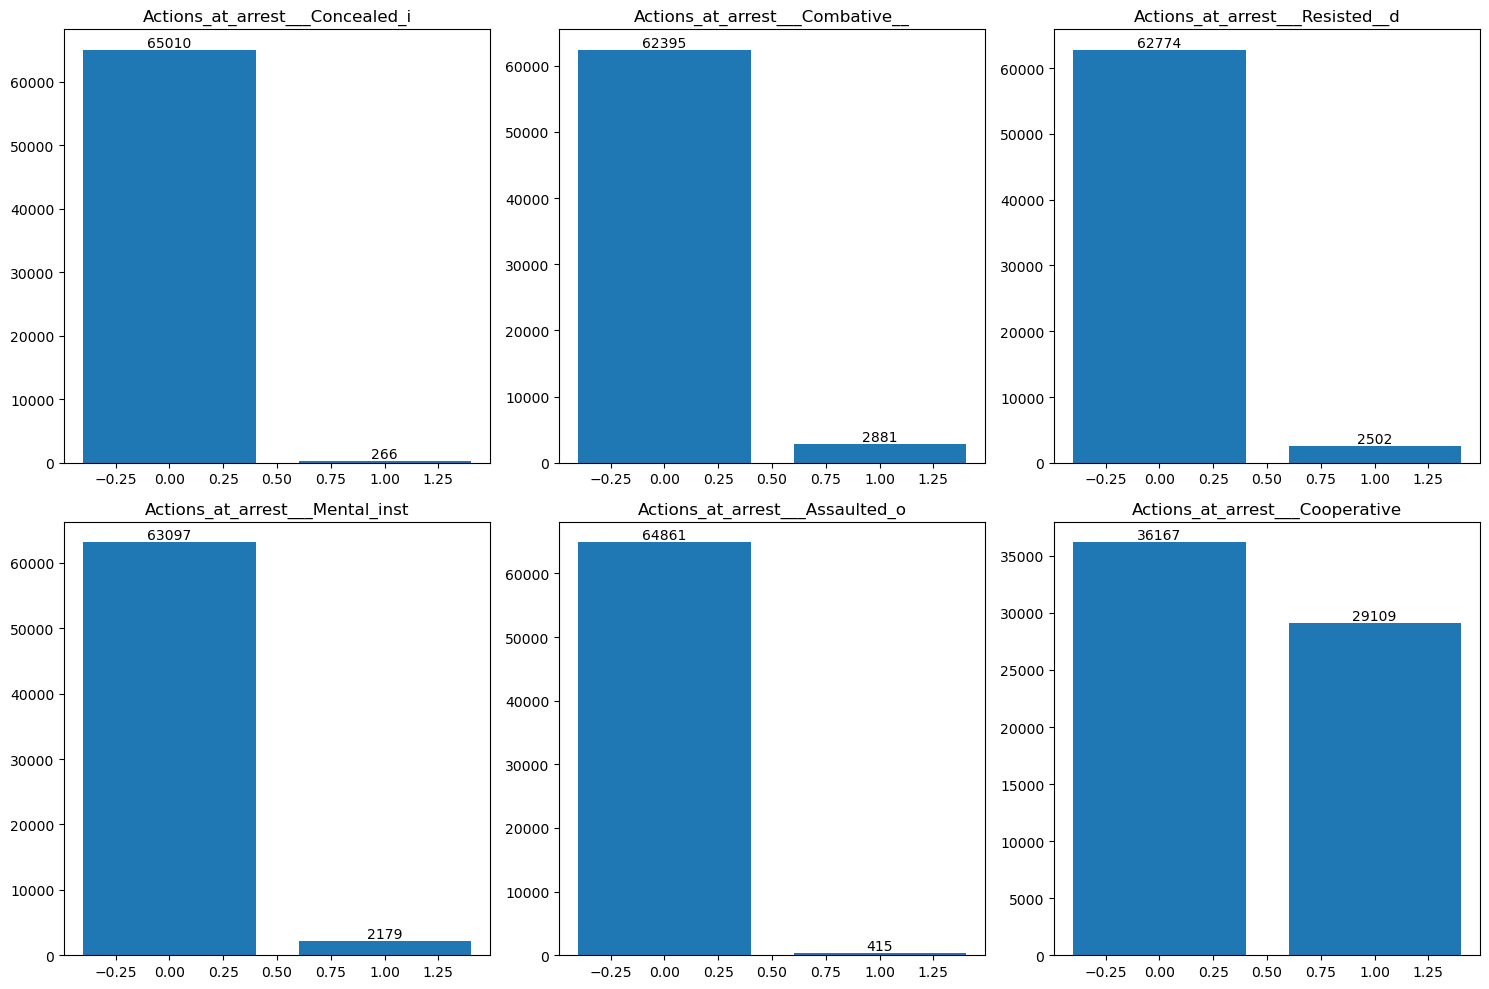

In [215]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10))

columns = ['Actions_at_arrest___Concealed_i','Actions_at_arrest___Combative__','Actions_at_arrest___Resisted__d','Actions_at_arrest___Mental_inst','Actions_at_arrest___Assaulted_o','Actions_at_arrest___Cooperative']

for i, column in enumerate(columns):
    values = df[column].value_counts().sort_index()
    row = i // 3
    col = i % 3
    ax[row, col].bar(values.index, values.values)
    ax[row, col].set_title(column)
    for x, y in zip(values.index, values.values):
        ax[row, col].text(x, y, str(y), ha='center', va='bottom')

plt.tight_layout()
plt.show()


The graphical representation of "action_cooperation_at_arrest" distribution across different racial and gender groups provides some clear patterns of non-cooperative behavior. However, upon analysis of the graphical data, no significant correlation was observed between the number of arrests for non-cooperation and age or gender. The sex data collected for the Latino population differed somewhat from that of other racial groups. Notably, there was a higher proportion of individuals who identified as undecided sex. Despite this variation, the male-to-female ratio among the Latino population was still comparable to that of other racial groups, indicating a relatively balanced distribution of sex.

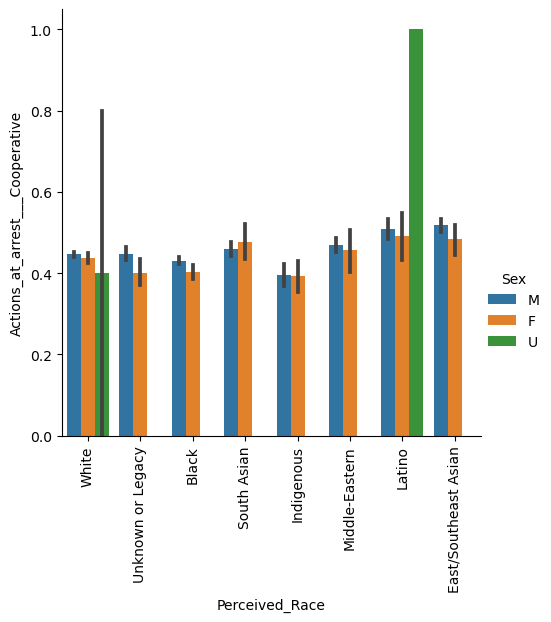

In [216]:
# Grouped bar plot of Actions_at_arrest based on race and sex
g = sns.catplot(x="Perceived_Race", y="Actions_at_arrest___Cooperative", hue="Sex", kind="bar", data=df)
g.set_xticklabels(rotation=90)
plt.show()


## For the research question 2:

1. the first step observes the distribution of 0s and 1s in stripsearch
2. the second step observes that the likelihood of being strip-searched varies by race
3. the third step observes that the likelihood of being strip-searched varies by gender
4. step 4 observe the relationship between perceived race and gender and the likelihood of being strip-searched.
5. Step 5 observe Youth and non-youth
   1. group "17 years and younger" and "17 years and younger" together
   2. show how the status of youth and non-youth affects the likelihood of being strip searched



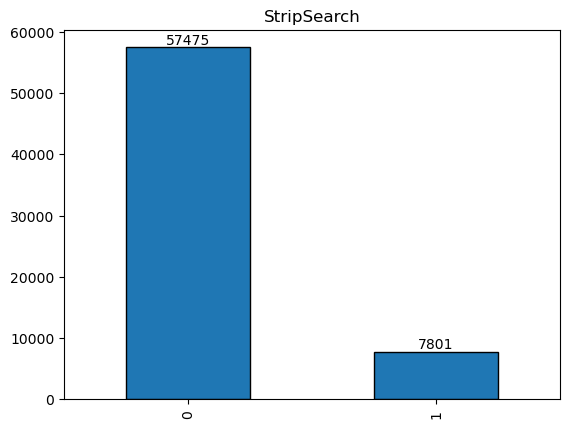

In [217]:
# Create bar plots for the StripSearch column with numbers
df['StripSearch'].value_counts().plot(kind='bar', edgecolor='black')
plt.title('StripSearch')
for i in range(len(df['StripSearch'].value_counts())):
    count = df['StripSearch'].value_counts().values[i]
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.show()


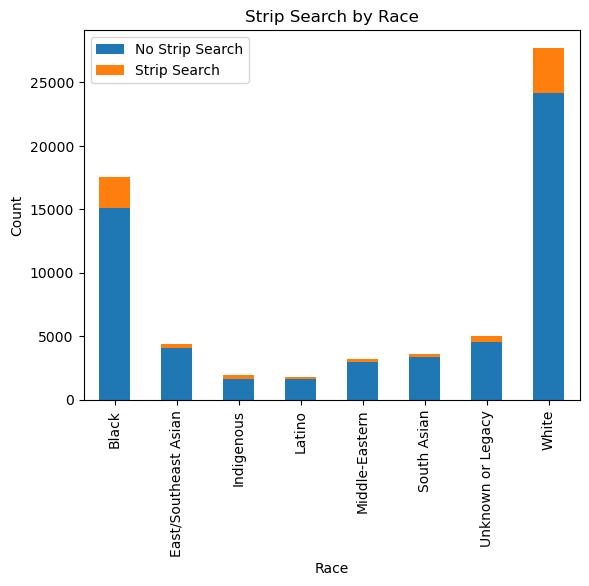

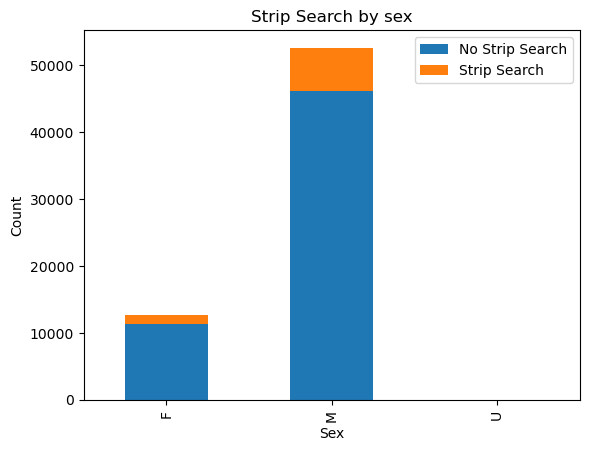

In [218]:
# Create a cross-tabulation of race and strip search
race = pd.crosstab(df['Perceived_Race'], df['StripSearch'])

# Plot the cross-tabulation as a bar chart
race.plot(kind="bar", stacked=True)

# Add a legend to the plot
plt.legend(['No Strip Search', 'Strip Search'])

# Add a title and labels to the plot
plt.title("Strip Search by Race")
plt.xlabel("Race")
plt.ylabel("Count")

# Display the plot
plt.show()

# Create a cross-tabulation of sex and strip search
race = pd.crosstab(df['Sex'], df['StripSearch'])

# Plot the cross-tabulation as a bar chart
race.plot(kind="bar", stacked=True)

# Add a legend to the plot
plt.legend(['No Strip Search', 'Strip Search'])

# Add a title and labels to the plot
plt.title("Strip Search by sex")
plt.xlabel("Sex")
plt.ylabel("Count")

# Display the plot
plt.show()

Sex                          F         M    U
Perceived_Race                               
Black                 0.084661  0.150131  NaN
East/Southeast Asian  0.033557  0.086104  NaN
Indigenous            0.117647  0.177778  NaN
Latino                0.037879  0.081171  0.0
Middle-Eastern        0.049451  0.073094  NaN
South Asian           0.053045  0.074098  NaN
Unknown or Legacy     0.103672  0.106615  0.0
White                 0.126135  0.129396  0.0


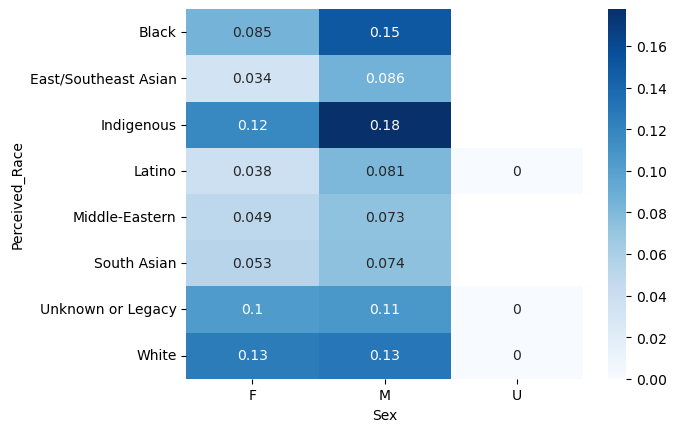

In [219]:
# Create a cross-tabulation table
ct = pd.crosstab(df['Perceived_Race'], df['Sex'], values=df['StripSearch'], aggfunc='mean')
print(ct)

# Plot the cross-tabulation table
sns.heatmap(ct, annot=True, cmap='Blues')
plt.show()


Sex                                     F         M    U
Youth_at_arrest__under_18_years                         
Not a Youth                      0.105352  0.124531  0.0
Youth (aged 17 and younger)      0.042292  0.107839  NaN


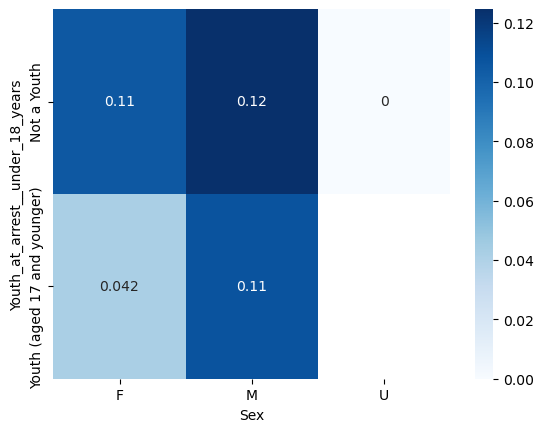

In [220]:
# Replace the values in the Youth_at_arrest__under_18_years column
df['Youth_at_arrest__under_18_years'] = df['Youth_at_arrest__under_18_years'].replace({'Youth (aged 17 years and under)': 'Youth (aged 17 and younger)',
                                                                                        'Not a youth': 'Not a Youth'})
# Create a cross-tabulation tables
ct = pd.crosstab(df['Youth_at_arrest__under_18_years'], df['Sex'], values=df['StripSearch'], aggfunc='mean')
print(ct)

# Plot the cross-tabulation table
sns.heatmap(ct, annot=True, cmap='Blues')
plt.show()


# Chi-square for Q1

In [214]:
# Import the chi-square test function from the scipy library
from scipy.stats import chi2_contingency

# Columns to perform the chi-square test on
columns = ['Actions_at_arrest___Concealed_i', 'Actions_at_arrest___Combative__', 'Actions_at_arrest___Resisted__d', 
           'Actions_at_arrest___Mental_inst', 'Actions_at_arrest___Assaulted_o', 'Actions_at_arrest___Cooperative']

# Loop through each column
for col in columns:
    # Create a cross-tabulation table of Actions_at_arrest and demographic variables
    ct = pd.crosstab(df[col], [df['Perceived_Race'], df['Sex']])

    # Perform the chi-square test
    chi2, p, dof, expected = chi2_contingency(ct)

    # Print the results of the chi-square test
    print('Column:', col)
    print('Chi-square Statistic:', chi2)
    print('p-value:', p)
    print()


Column: Actions_at_arrest___Concealed_i
Chi-square Statistic: 44.88627540422583
p-value: 0.0004303774588250413

Column: Actions_at_arrest___Combative__
Chi-square Statistic: 166.68140412223775
p-value: 4.075329063658174e-26

Column: Actions_at_arrest___Resisted__d
Chi-square Statistic: 126.40560341457653
p-value: 2.566982658286319e-18

Column: Actions_at_arrest___Mental_inst
Chi-square Statistic: 126.80873925292212
p-value: 2.1515611773493482e-18

Column: Actions_at_arrest___Assaulted_o
Chi-square Statistic: 51.62034346267761
p-value: 4.2782849486643414e-05

Column: Actions_at_arrest___Cooperative
Chi-square Statistic: 193.01928544747201
p-value: 2.4807740658724804e-31



# T-test

## Hypothesis#1

HO (Null Hypothesis): The population means of the two independent groups, youth and non-youth and their corresponding sex, are equal with regards to the likelihood of being strip searched.

HA (Alternative Hypothesis): The population means of the two independent groups, youth and non-youth and their corresponding sex, are not equal with regards to the likelihood of being strip searched.



In [161]:
# Import the necessary library
from scipy.stats import ttest_ind

# Group the data by Youth_at_arrest__under_18_years and Sex
grouped = df.groupby(['Youth_at_arrest__under_18_years', 'Sex'])

# Calculate the mean of StripSearch for each group
mean = grouped['StripSearch'].mean()

# Perform the t-test for each group
for name, group in grouped:
    youth, sex = name
    t, p = ttest_ind(group['StripSearch'], df[(df['Youth_at_arrest__under_18_years'] != youth) & (df['Sex'] == sex)]['StripSearch'], equal_var=False)
    print("T-test for youth = {0} and sex = {1}: t = {2:.3f}, p = {3:.3f}".format(youth, sex, t, p))


T-test for youth = Not a Youth and sex = F: t = 7.928, p = 0.000
T-test for youth = Not a Youth and sex = M: t = 2.521, p = 0.012
T-test for youth = Not a Youth and sex = U: t = nan, p = nan
T-test for youth = Youth (aged 17 and younger) and sex = F: t = -7.928, p = 0.000
T-test for youth = Youth (aged 17 and younger) and sex = M: t = -2.521, p = 0.012


## Hypothesis#2

* HO (Null Hypothesis): The population means of the two independent groups, youth and non-youth and their corresponding race, are equal with regards to the likelihood of being strip searched.

* HA (Alternative Hypothesis): The population means of the two independent groups, youth and non-youth and their corresponding race, are not equal with regards to the likelihood of being strip searched.



In [221]:
# Group the data by Youth_at_arrest__under_18_years and Race
grouped = df.groupby(['Youth_at_arrest__under_18_years', 'Perceived_Race'])

# Calculate the mean of StripSearch for each group
mean = grouped['StripSearch'].mean()

# Perform the t-test for each group
for name, group in grouped:
    youth, race = name
    t, p = ttest_ind(group['StripSearch'], df[(df['Youth_at_arrest__under_18_years'] != youth) & (df['Perceived_Race'] == race)]['StripSearch'], equal_var=False)
    print("T-test for youth = {0} and Perceived_Race = {1}: t = {2:.3f}, p = {3:.3f}".format(youth, race, t, p))


T-test for youth = Not a Youth and Perceived_Race = Black: t = 2.592, p = 0.010
T-test for youth = Not a Youth and Perceived_Race = East/Southeast Asian: t = 1.868, p = 0.063
T-test for youth = Not a Youth and Perceived_Race = Indigenous: t = -1.025, p = 0.316
T-test for youth = Not a Youth and Perceived_Race = Latino: t = -1.433, p = 0.156
T-test for youth = Not a Youth and Perceived_Race = Middle-Eastern: t = 0.105, p = 0.916
T-test for youth = Not a Youth and Perceived_Race = South Asian: t = -0.708, p = 0.481
T-test for youth = Not a Youth and Perceived_Race = Unknown or Legacy: t = 0.469, p = 0.640
T-test for youth = Not a Youth and Perceived_Race = White: t = 8.210, p = 0.000
T-test for youth = Youth (aged 17 and younger) and Perceived_Race = Black: t = -2.592, p = 0.010
T-test for youth = Youth (aged 17 and younger) and Perceived_Race = East/Southeast Asian: t = -1.868, p = 0.063
T-test for youth = Youth (aged 17 and younger) and Perceived_Race = Indigenous: t = 1.025, p = 0.316

# Research methods

### One-way ANOVA + Tukey's HSD

In [163]:
# Import the necessary library
from sklearn.preprocessing import LabelEncoder

# Create a new column to represent the Actions_at_arrest
df['Actions_at_arrest'] = df[['Actions_at_arrest___Concealed_i','Actions_at_arrest___Combative__','Actions_at_arrest___Resisted__d'
                              ,'Actions_at_arrest___Mental_inst','Actions_at_arrest___Assaulted_o','Actions_at_arrest___Cooperative']].idxmax(axis=1)

# Create a LabelEncoder object
le = LabelEncoder()

# Fit the LabelEncoder on the Actions_at_arrest column
le.fit(df['Actions_at_arrest'])

# Transform the Actions_at_arrest column into numerical values
df['Actions_at_arrest'] = le.transform(df['Actions_at_arrest'])

# Group the data by Perceived_Race and Sex
grouped = df.groupby(['Perceived_Race', 'Sex'])

# Split the data into separate groups for each Perceived_Race and Sex combination
groups = [group['Actions_at_arrest'] for name, group in grouped]

# Perform the One-Way ANOVA
f, p = f_oneway(*groups)

# Print the results of the One-Way ANOVA
print('F-Statistic:', f)
print('p-value:', p)

# Perform Tukey's HSD test
mc = MultiComparison(np.concatenate(groups), df['Perceived_Race'].map(actions_dict).astype(str) + df['Sex'].astype(str))
result = mc.tukeyhsd()

# Print the results of Tukey's HSD test
print(result)

F-Statistic: 4.34696910458692
p-value: 1.7605697487295893e-09
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
  nanF   nanM   0.0059 0.6995 -0.0112  0.023  False
  nanF   nanU  -0.0582 0.9696 -0.6348 0.5184  False
  nanM   nanU  -0.0641 0.9632 -0.6405 0.5123  False
---------------------------------------------------


### Two-way ANOVA + Tukey's HSD

In [222]:
import statsmodels.api as sm

# Fit a Two-Way ANOVA model
model = sm.OLS.from_formula('StripSearch ~ C(Youth_at_arrest__under_18_years) * C(Perceived_Race) * C(Sex)', data=df)
results = model.fit()

# Print the results of the Two-Way ANOVA
print(results.summary())

# Create a factor variable that combines Youth_at_arrest__under_18_years, Perceived_Race, and Sex
df['factor'] = df['Youth_at_arrest__under_18_years'].astype(str) + '' + df['Perceived_Race'].astype(str) + '' + df['Sex'].astype(str)

# Perform Tukey's HSD
mc = MultiComparison(df['StripSearch'], df['factor'])
tukey = mc.tukeyhsd()

# Print the results of the Tukey HSD test

print(tukey)

                            OLS Regression Results                            
Dep. Variable:            StripSearch   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     17.36
Date:                Tue, 28 Feb 2023   Prob (F-statistic):          3.89e-102
Time:                        21:27:02   Log-Likelihood:                -18839.
No. Observations:               65276   AIC:                         3.775e+04
Df Residuals:                   65241   BIC:                         3.807e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                                                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------

                                          Multiple Comparison of Means - Tukey HSD, FWER=0.05                                           
                     group1                                           group2                      meandiff p-adj   lower   upper  reject
----------------------------------------------------------------------------------------------------------------------------------------
                               Not a YouthBlackF                                Not a YouthBlackM   0.0606    0.0  0.0346  0.0867   True
                               Not a YouthBlackF                 Not a YouthEast/Southeast AsianF   -0.056 0.0182 -0.1083 -0.0038   True
                               Not a YouthBlackF                 Not a YouthEast/Southeast AsianM  -0.0029    1.0 -0.0344  0.0287  False
                               Not a YouthBlackF                           Not a YouthIndigenousF   0.0276 0.9951 -0.0274  0.0826  False
                               Not a Yout